### Multiple scattering effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
import scipy.stats


# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Momentum calculation

The total energy of a particle is the sum of its rest energy and its kinetic energy:

$$E_{total} = E_0+E_k$$

The $E_0=m_0c^2$ and the $E_{total}= \gamma m_0c^2$, then the gamma factor is

$$\gamma = \frac{E_k}{m_0c^2} + 1$$

On the other hand, $\beta$ is:

$$\beta = \frac{\sqrt{\gamma^2-1}}{\gamma}$$
and the momentum $p$ is
$$\frac{p}{c} = m_o\gamma \beta $$

In [2]:
Ek = np.linspace(0.1,1000,1000)*1e9 # kinetic energy [eV]
m0 = 105.6e6 # muon mass [eV/c2]

gamma = Ek/m0 + 1
beta = np.sqrt(gamma**2 -1)/gamma
p = m0*gamma*beta

La dispersión angular se puede aproximar a una distribución Gausiana con media cero y con una desviación estándar $\sigma_\Phi$ que depende de la longitud de radiación $X_0$, del grosor del material $x$ y del momentum del muón $p$ y cuya expresión es:

$$\sigma_\Phi \approx \frac{13.6 MeV}{\beta p c} \sqrt{\frac{x}{X_0}}$$

$$X_0 = \frac{716.4 (g/cm^2)}{\rho} \frac{A}{Z(Z+1)\log (287/\sqrt{Z})}$$
donde $\rho$ es la densidad, $Z$ es el número atómico y $A$ la masa del material.

In [3]:
X0 = 26.54 # radiation lenght for standar rock [g/cm2]
density = 2.65 # density [g/cm3]
N = len(Ek)

d = [10, 100, 1000] # rock thickness [m]
theta = np.zeros((3,N))

for i in range (3):
    x = d[i]*1e2*density # rock thickness in X0 units [g/cm2]

    sigma = 13.6e6/(beta*p)*np.sqrt(x/X0)
    theta[i,:] = sigma*180/np.pi

### Minimum energy threshold

In [4]:
Emin = np.array([5e9, 60e9, 1000e9])

gamma_m = Emin/m0 + 1
beta_m = np.sqrt(gamma_m**2 -1)/gamma_m
p_m = m0*gamma_m*beta_m

theta_m = np.zeros(3)

for i in range (3):
    x = d[i]*1e2*density # rock thickness in X0 units [g/cm2]

    sigma_m = 13.6e6/(beta_m[i]*p_m[i])*np.sqrt(x/X0)
    theta_m[i] = sigma_m*180/np.pi

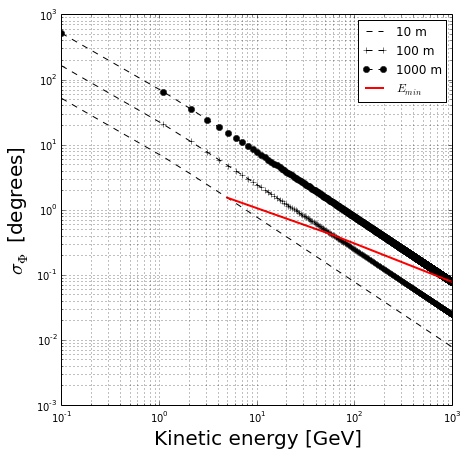

In [5]:
fig = plt.figure(figsize=(7, 7))
plt.loglog(Ek/1e9,theta[0,:], '--k')
plt.loglog(Ek/1e9,theta[1,:], '--+k')
plt.loglog(Ek/1e9,theta[2,:], '--ok')
plt.loglog(Emin/1e9, theta_m, '-r', linewidth = 2)
plt.xlabel("Kinetic energy [GeV]", fontsize = 20)
plt.ylabel("$\sigma_\Phi$ [degrees]", fontsize = 20)
plt.legend(["10 m", "100 m", "1000 m", "$E_{min}$"], loc = 1)
plt.grid(which='both', axis='both')
plt.show()

### Momentum estimation by means ToF

Ref: Joseph Best. MOMENTUM OF PARTICLES FROM TIME-OF-FLIGHT MEASUREMENTS. University of South Carolina. 2015

In kinematics, for a particle that travels a distance $L$ in time $t$, the velocity v is defined by

$$v=\frac{L}{t}$$

Velocity can be related to momentum through the equation

$$\beta=\frac{pc}{E}$$

where c is the speed of light and $\beta$ is the ratio $v/c$. Substituting becomes

$$v=c^2\frac{p}{E}$$

To find the energy $E$, we must use the equation

$$E^2=(pc)^2+(m_0c^2)^2$$

Mixing the last two equations we get

$$t=\frac{L}{c}\sqrt{\frac{m_o^2c^2}{p^2}+1}$$

and the particle momentum is

$$p=\frac{m_0cL}{\sqrt{c^2t^2-L^2}}$$

In [10]:
L= 2.5 # hodoscope separation [m]
c = 3e8 # light speed [m/s]

p = np.linspace(0.1,100,10000)*1e9/c # Res 10 MeV/c
p100 = np.linspace(0.1,100,1000)*1e9/c # Res 100 Mev/c

m0 = 105.6e6/(c**2) # muon mass [eV/c2]

ToF_mu = (L/c)*np.sqrt(((m0**2)*(c**2))/(p**2)+1)
ToF_mu100 = (L/c)*np.sqrt(((m0**2)*(c**2))/(p100**2)+1)

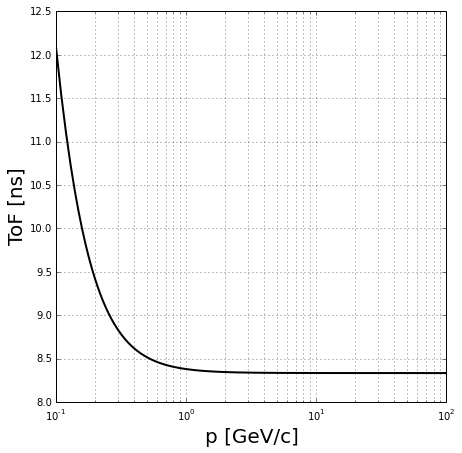

In [11]:
fig = plt.figure(figsize=(7, 7))
plt.semilogx(p*c/1e9, ToF_mu*1e9, '-k', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("ToF [ns]", fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()

### ToF minimum resolution

In [12]:
N = len(p)
M = len(p100)
dT = np.zeros(N)
dT100 = np.zeros(M)

# 10 MeV/c momentum resolution

for i in range (N-1):
    dT[i] = ToF_mu[i] - ToF_mu [i+1]
    dp = np.abs(p[i]*c/1e6 - p[i+1]*c/1e6)

print "Momentum error = " + str(dp) + " MeV"

# 100 MeV/c momentum resolution

for i in range (M-1):
    dT100[i] = ToF_mu100[i] - ToF_mu100 [i+1]
    dp = np.abs(p100[i]*c/1e6 - p100[i+1]*c/1e6)

print "Momentum error = " + str(dp) + " MeV"


Momentum error = 9.990999099900364 MeV
Momentum error = 100.0 MeV


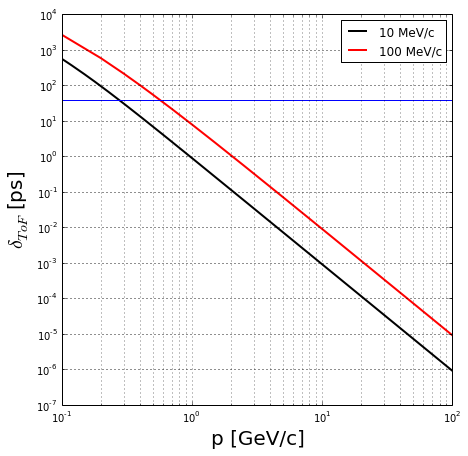

In [21]:
fig = plt.figure(figsize=(7, 7))
plt.loglog(p*c/1e9, dT*1e12, '-k', lw = 2)
plt.loglog(p100*c/1e9, dT100*1e12, '-r', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("$\delta_{ToF}$ [ps]", fontsize = 20)
plt.axhline(y=40)
plt.legend(["10 MeV/c", "100 MeV/c"])
plt.grid(which='both', axis='both')
plt.show()

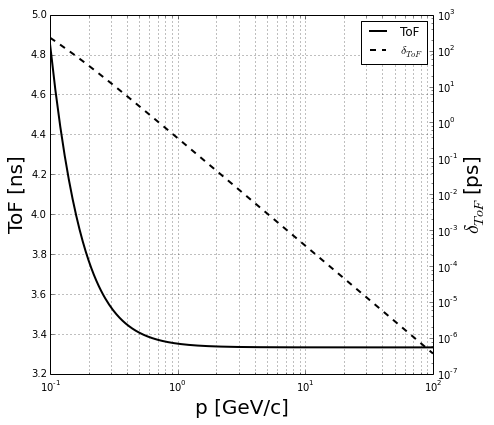

In [10]:
fig, ax1 = plt.subplots(figsize=(7, 6))

ln1 = ax1.semilogx(p*c/1e9, ToF_mu*1e9, '-k', lw = 2, label = "ToF")
ax1.set_ylabel("ToF [ns]", fontsize = 20)
ax1.set_xlabel("p [GeV/c]", fontsize = 20)
plt.grid(which='both', axis='both')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ln2 = ax2.loglog(p*c/1e9, dT*1e12, '--k', lw = 2, label="$\delta_{ToF}$")
ax2.set_ylabel("$\delta_{ToF}$ [ps]", fontsize = 20)  # we already handled the x-label with ax1


lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



### ToF comparison for muon and electrons

In [11]:
L= 1 # hodoscope separation [m]
c = 3e8 # light speed [m/s]

p = np.linspace(0.00001,100,1000000)*1e9/c

m0 = 105.6e6/(c**2) # muon mass [eV/c2]
me = 0.5e6/(c**2) # electron mass [eV/c2]

ToF_mu = (L/c)*np.sqrt(((m0**2)*(c**2))/(p**2)+1)
ToF_e = (L/c)*np.sqrt(((me**2)*(c**2))/(p**2)+1)

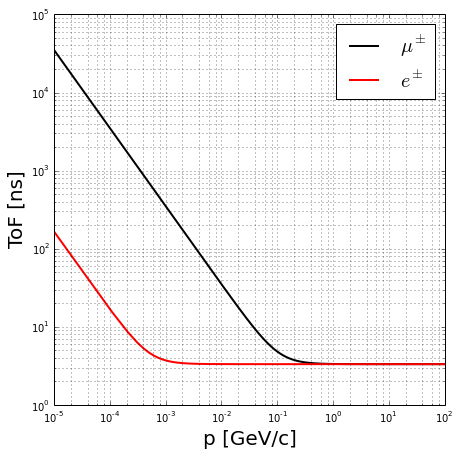

In [12]:
fig = plt.figure(figsize=(7, 7))
plt.loglog(p*c/1e9, ToF_mu*1e9, '-k', lw = 2)
plt.loglog(p*c/1e9, ToF_e*1e9, '-r', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("ToF [ns]", fontsize = 20)
plt.legend(["$\mu^{\pm}$","$e^{\pm}$"], fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()

### Background noise rejection by means of the muon momentum estimation

    - R. Nishiyama. Experimental study of source of background noise in muon radiography using emulsion film detectors. The University of Tokyo. 2014

    - H. Gómez. Forward scattering effects on muon imaging. Journal of Instrumentation. 2018

This study confirms that the source of background noise in muon radiography is charged particles with momenta <
2 GeV/c . It also demonstrates that a momentum-discerning detector, like an ECC detector, can reduce the contamination from background noise to negligible levels.

### -dE/dx for particle identification - Cerenkov efect

-- Detektoren für Teilchenstraghlung. Konrad Kleinknecht

$$\cos \theta_c = \frac{1}{n\beta}$$

$$\frac{dN}{dx}=2 \pi \alpha z^2 \int_{\lambda_1}^{\lambda_2} \left(1- \frac{1}{n^2 \lambda \beta^2} \right) \frac{d \lambda}{\lambda^2} \approx 2 \pi \alpha z^2 \sin^2 \theta_c \left( \frac{\lambda_2-\lambda_1}{\lambda_2 \lambda_1} \right)$$

Para 400 - 700 nm

$$ = 490 \sin^2 \theta_c \ \text{[photons/cm]}$$ 

Para 200 - 700 nm

$$ = 1150 \sin^2 \theta_c \ \text{[photons/cm]}$$ 

El PMT R5912 300 - 650 nm

In [13]:
# Visible range 300 - 570 nm Hernan Asorey
alpha = 7.297e-3
lambda_1 = 300e-9
lambda_2 = 570e-9
K = 2*np.pi*alpha*(lambda_2-lambda_1)/(lambda_2*lambda_1)
K/100

723.9221555761492

In [14]:
n = 1.33
c = 3e8 # light speed [m/s]

m0 = 105.6e6/(c**2) # muon mass [eV/c2]
me = 0.5e6/(c**2) # electron mass [eV/c2]

p = np.linspace(0.00000001,100,1000000)*1e9/c

gamma_m0 = np.sqrt((p/(m0*c))**2+1)
beta_m0 = np.sqrt(gamma_m0**2 -1)/gamma_m0
thetac_m0 = np.arccos(1/(n*beta_m0))
dNdx_m0 = 723*(np.sin(thetac_m0))**2

gamma_me = np.sqrt((p/(me*c))**2+1)
beta_me = np.sqrt(gamma_me**2 -1)/gamma_me
thetac_me = np.arccos(1/(n*beta_me))
dNdx_me = 723*(np.sin(thetac_me))**2

print ("Maximum of photons/cm = ") + str(dNdx_me[-1])

Maximum of photons/cm = 314.27141160151785


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in arccos


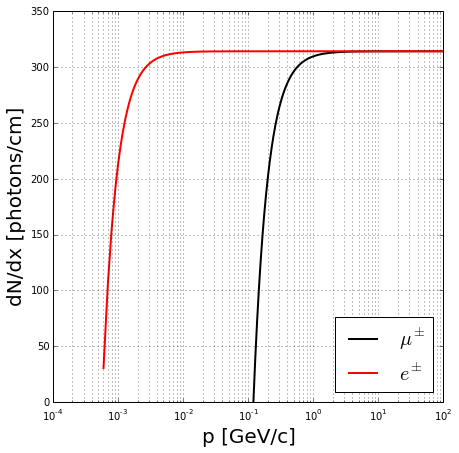

In [15]:
fig = plt.figure(figsize=(7, 7))
plt.semilogx(p*c/1e9, dNdx_m0, '-k', lw = 2)
plt.semilogx(p*c/1e9, dNdx_me, '-r', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("dN/dx [photons/cm]", fontsize = 20)
plt.legend(["$\mu^{\pm}$","$e^{\pm}$"], fontsize = 20, loc=4)
plt.grid(which='both', axis='both')
plt.show()

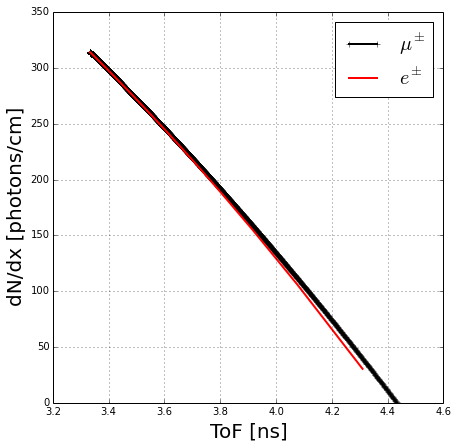

In [16]:
fig = plt.figure(figsize=(7, 7))
plt.plot(ToF_mu*1e9, dNdx_m0, '-+k', lw = 2)
plt.plot(ToF_e*1e9, dNdx_me, '-r', lw = 2)
plt.xlabel("ToF [ns]", fontsize = 20)
plt.ylabel("dN/dx [photons/cm]", fontsize = 20)
plt.legend(["$\mu^{\pm}$","$e^{\pm}$"], fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()

### Spectrum distribution

In [17]:
c = 3e8 # light speed [m/s]

m0 = 105.6e6/(c**2) # muon mass [eV/c2]
me = 0.5e6/(c**2) # electron mass [eV/c2]

mu_muon = 7
sig_muon = 0.9

mu_elec = 1
sig_elec = 0.9

E_mu = (np.random.lognormal(mu_muon, sig_muon, 4000))*1e7
E_e = (np.random.lognormal(mu_elec, sig_elec, 3000))*1e7

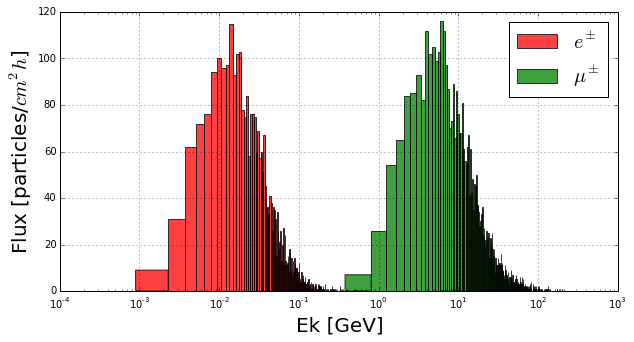

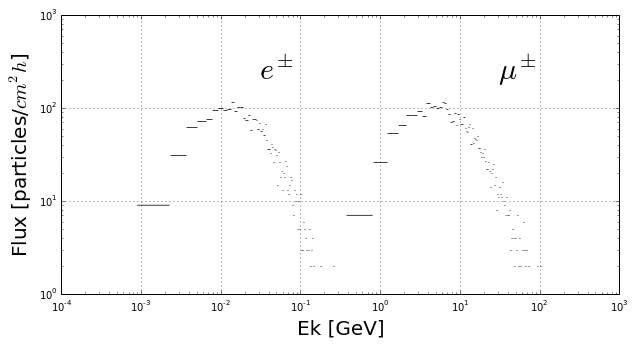

In [18]:
plt.figure(figsize=[10,5])
plt.xscale('log')
plt.hist(E_e/1e9, 500, facecolor='r', alpha=0.75)
plt.hist(E_mu/1e9, 500, facecolor='g', alpha=0.75)
plt.xlabel("Ek [GeV]", fontsize = 20)
plt.ylabel("Flux [particles/$cm^{2}h$]", fontsize = 20)
plt.legend(["$e^{\pm}$", "$\mu^{\pm}$"], fontsize = 20)
plt.grid()

plt.figure(figsize=[10,5])
plt.xscale('log')
plt.yscale('log')
plt.hist(E_e/1e9, 500, facecolor='r', alpha=0.75)
plt.hist(E_mu/1e9, 500, facecolor='g', alpha=0.75)
plt.xlabel("Ek [GeV]", fontsize = 20)
plt.ylabel("Flux [particles/$cm^{2}h$]", fontsize = 20)
plt.text(3e-2,200,"$e^{\pm}$", fontsize = 30)
plt.text(3e1,200,"$\mu^{\pm}$", fontsize = 30)
plt.grid()

plt.show()

In [19]:
gamma_mu = E_mu/m0 + 1
beta_mu = np.sqrt(gamma_mu**2 -1)/gamma_mu
p_mu = m0*gamma_mu*beta_mu/c

gamma_e = E_e/me + 1
beta_e = np.sqrt(gamma_e**2 -1)/gamma_e
p_e = me*gamma_e*beta_e/c

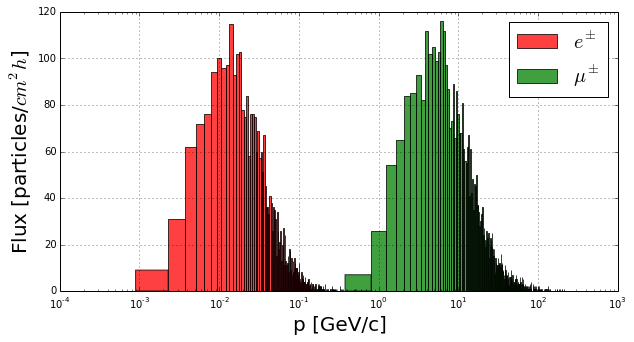

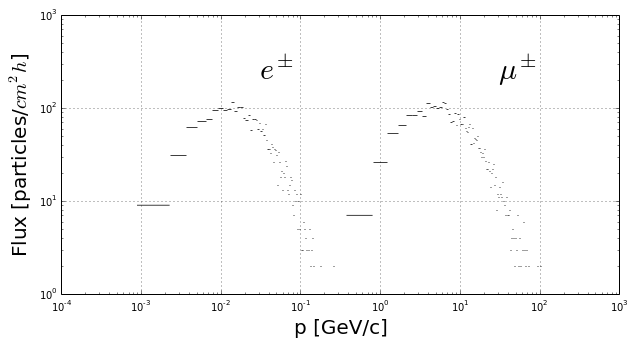

In [20]:
plt.figure(figsize=[10,5])
plt.xscale('log')
plt.hist(p_e*c/1e9, 500, facecolor='r', alpha=0.75)
plt.hist(p_mu*c/1e9, 500, facecolor='g', alpha=0.75)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("Flux [particles/$cm^{2}h$]", fontsize = 20)
plt.legend(["$e^{\pm}$", "$\mu^{\pm}$"], fontsize = 20)
plt.grid()

plt.figure(figsize=[10,5])
plt.xscale('log')
plt.yscale('log')
plt.hist(p_e*c/1e9, 500, facecolor='r', alpha=0.75)
plt.hist(p_mu*c/1e9, 500, facecolor='g', alpha=0.75)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("Flux [particles/$cm^{2}h$]", fontsize = 20)
plt.text(3e-2,200,"$e^{\pm}$", fontsize = 30)
plt.text(3e1,200,"$\mu^{\pm}$", fontsize = 30)
plt.grid()

plt.show()

### ToF calculation

In [21]:
L= 1 # hodoscope separation [m]

ToF_mu = (L/c)*np.sqrt(((m0**2)*(c**2))/(p_mu**2)+1)
ToF_e = (L/c)*np.sqrt(((me**2)*(c**2))/(p_e**2)+1)

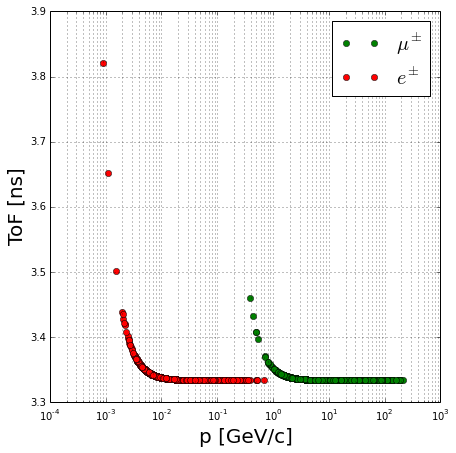

In [22]:
fig = plt.figure(figsize=(7, 7))
plt.semilogx(p_mu*c/1e9, ToF_mu*1e9, 'og', lw = 2)
plt.semilogx(p_e*c/1e9, ToF_e*1e9, 'or', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("ToF [ns]", fontsize = 20)
plt.legend(["$\mu^{\pm}$","$e^{\pm}$"], fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()

### -dN/dx calculation

In [23]:
n = 1.33
c = 3e8 # light speed [m/s]

m0 = 105.6e6/(c**2) # muon mass [eV/c2]
me = 0.5e6/(c**2) # electron mass [eV/c2]

gamma_m0 = np.sqrt((p_mu/(m0*c))**2+1)
beta_m0 = np.sqrt(gamma_m0**2 -1)/gamma_m0
thetac_m0 = np.arccos(1/(n*beta_m0))
dNdx_m0 = 723*(np.sin(thetac_m0))**2

gamma_me = np.sqrt((p_e/(me*c))**2+1)
beta_me = np.sqrt(gamma_me**2 -1)/gamma_me
thetac_me = np.arccos(1/(n*beta_me))
dNdx_me = 723*(np.sin(thetac_me))**2


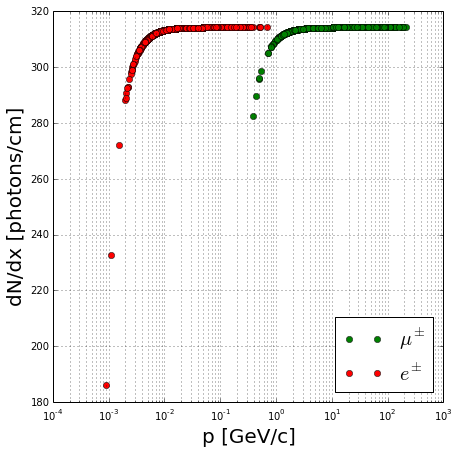

In [24]:
fig = plt.figure(figsize=(7, 7))
plt.semilogx(p_mu*c/1e9, dNdx_m0, 'og', lw = 2)
plt.semilogx(p_e*c/1e9, dNdx_me, 'or', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("dN/dx [photons/cm]", fontsize = 20)
plt.legend(["$\mu^{\pm}$","$e^{\pm}$"], fontsize = 20, loc=4)
plt.grid(which='both', axis='both')
plt.show()

### Feature space expansion

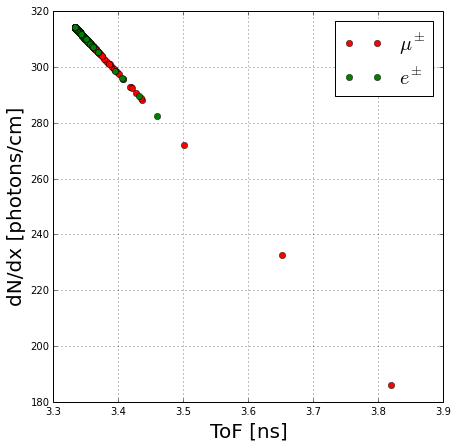

In [25]:
fig = plt.figure(figsize=(7, 7))
plt.plot(ToF_e*1e9, dNdx_me, 'or', lw = 2)
plt.plot(ToF_mu*1e9, dNdx_m0, 'og', lw = 2)
plt.xlabel("ToF [ns]", fontsize = 20)
plt.ylabel("dN/dx [photons/cm]", fontsize = 20)
plt.legend(["$\mu^{\pm}$","$e^{\pm}$"], fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()

### -dE/dx calculation

In [38]:
c = 3e8 # light speed [m/s]

p = np.linspace(0.0001,100,1000000)*1e9/c

m0 = 105.6e6/(c**2) # muon mass [eV/c2]
me = 0.5e6/(c**2) # electron mass [eV/c2]

K = 0.307e6 # [MeV/g cm2]
z = 1
Z = 10.0      # Water atomic number
A = 18.0      # Water atomic weight 

gamma_mu = np.sqrt((p/(m0*c))**2+1)
beta_mu = np.sqrt(gamma_mu**2 -1)/gamma_mu

gamma_e = np.sqrt((p/(me*c))**2+1)
beta_e = np.sqrt(gamma_e**2 -1)/gamma_e

Tmax_mu = 2*me*(c**2)*(beta_mu**2)*(gamma_mu)**2
Tmax_e = 2*me*(c**2)*(beta_e**2)*(gamma_e)**2

if (Z<12):
    I = (12.0+7.0/Z)*Z     # Mean excitation energy
else:
    I = (9.76 + 58.8*np.power(Z,-1.19))*Z

print ("Mean excitation energy = ") + str(I)

Mean excitation energy = 127.0


In [39]:
dEdx_mu = K*(Z/A)*(z**2/beta_mu**2)*(0.5*np.log((2*me*(c**2)*(beta_mu**2)*(gamma_mu**2)*Tmax_mu)/I**2) - beta_mu**2)
dEdx_e = K*(Z/A)*(z**2/beta_e**2)*(0.5*np.log((2*me*(c**2)*(beta_e**2)*(gamma_e**2)*Tmax_e)/I**2) - beta_e**2)

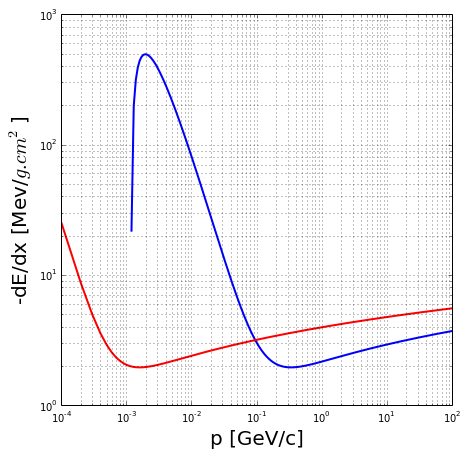

In [40]:
fig = plt.figure(figsize=(7, 7))
plt.loglog(p*c/1e9, dEdx_mu/1e6, '-b', lw = 2)
plt.loglog(p*c/1e9, dEdx_e/1e6, '-r', lw = 2)
plt.xlabel("p [GeV/c]", fontsize = 20)
plt.ylabel("-dE/dx [Mev/$g.cm^2$]", fontsize = 20)
plt.grid(which='both', axis='both')
plt.show()